# Load data and python libraries

In [1]:
# make plot s appear after the code cell
%matplotlib inline 

# data processing libraries
import pandas as pd
import numpy as np
import collections

# display wider columns in pandas data frames where necessary
pd.set_option('max_colwidth',150)

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# supporting libraries
import re
import math
import numpy as np
import pickle

In [2]:
# file location of the data
input_folder = './data/'
output_folder = './transition_files/'

file_name = 'hotel420_all_reviewnresponse (5).txt' # original .xlsx file was saved as tab delimeted .txt

In [3]:
# load data
df_data = pd.read_csv(input_folder + file_name, #file location
                      encoding = "ISO-8859-1", #deal with texts in different formats
                      sep='\t' #column delimiter
                     )

# display first row of the data frame
df_data.head(1).T

/Users/tatiana/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0
Hotel_ID,1
Hotel_originalname,ÊÊAustin-RÊRoÊAUSTIN\nFOUR SEASONS HOTEL AUST
address,"98 San Jacinto Blvd, Austin, TX 78701-4082"
price_range,"CN´3,223 - CN´10,600"
average_rating,4.5
number_of_reviews_hotel,"2,005"
hotel_star,5
Hotel_Name_tripadvisor,Four Seasons Hotel Austin
helpfulness_vote,0
mgtresponse_content,"Dear marver99,Thank you for choosing to stay at Four Seasons Hotel Austin and for taking the time to provide feedback on your visit. I appreciate ..."


# Data cleaning

In [4]:
def check_data (df):
    """
    check data types of values in the pandas data frame and number of missing values
    
    input:
        df - as pandas data frame to analyze
    
    output:
        pandas data frame with column name, 
                                column data type, 
                                the data type of actual value in the column
                                number of missing values
                                value example
    """
    df_data_types = []
    actual_data_types = []
    num_missing = []
    values = []
    columns = list(df_data.columns)
    
    for column in df_data.columns:
        #selecting only non missing values in the column
        df_tmp = df[df[column].isnull() == False]
        
        #count number of missing values
        num_missing.append(len(df) - len(df_tmp))
        
        #getting column data type
        dtype = str(df_tmp[column].dtypes)
        df_data_types.append(dtype)
                
        #getting data type of an actual value
        actual_value = df_tmp[column].iloc[0]
        m = re.search("'.+'", str(type(actual_value)))
        if m:
            dtype = m.group(0)
        else:
            dtype =  ''   
        actual_data_types.append(dtype)
        values.append(actual_value)
        
    #create data frame with data types comparison
    df_result = pd.DataFrame({
                              'data type': df_data_types,
                              'actual data type': actual_data_types,
                              'number of missing values': num_missing,
                              'value example': values
                             }, index=columns)
    return df_result

In [5]:
# checking data quality
print('datatype = "object" means the column has string and/or missing values in it.')
check_data(df_data)

datatype = "object" means the column has string and/or missing values in it.


,data type,actual data type,number of missing values,value example
Hotel_ID,int64,'numpy.int64',0,1
Hotel_originalname,object,'str',0,ÊÊAustin-RÊRoÊAUSTIN\nFOUR SEASONS HOTEL AUST
address,object,'str',0,"98 San Jacinto Blvd, Austin, TX 78701-4082"
price_range,object,'str',818,"CN´3,223 - CN´10,600"
average_rating,float64,'numpy.float64',0,4.5
number_of_reviews_hotel,object,'str',0,"2,005"
hotel_star,float64,'numpy.float64',0,5
Hotel_Name_tripadvisor,object,'str',0,Four Seasons Hotel Austin
helpfulness_vote,int64,'numpy.int64',0,0
mgtresponse_content,object,'str',110116,"Dear marver99,Thank you for choosing to stay at Four Seasons Hotel Austin and for taking the time to provide feedback on your visit. I appreciate ..."


In [6]:
# convert "number_of_reviews_hotel" to integer type
#delete any non-integer symbol from values of "number_of_reviews_hotel"
df_data['number_of_reviews_hotel'] = df_data['number_of_reviews_hotel'].str.replace('[^\d]', '', regex=True)

#convert string to integer
df_data['number_of_reviews_hotel'] = df_data['number_of_reviews_hotel'].apply(int)
df_data['number_of_reviews_hotel'].head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: number_of_reviews_hotel, dtype: int64

In [7]:
#since "reviewer_contribution" has mixed types, check strings that are mixed with integers
df_tmp = df_data[df_data['reviewer_contribution'].apply(str).str.contains('[a-z]', case=False, regex=True)]
df_tmp['reviewer_contribution'].value_counts()

it is None    10
Name: reviewer_contribution, dtype: int64

In [8]:
# replace non-integer values in "reviewer_contribution" with 0
df_data['reviewer_contribution'] = df_data['reviewer_contribution'].apply(str).str.replace('[^\d]', '0', regex=True)

# convert reviewer_contribution to integer type 
df_data['reviewer_contribution'] = df_data['reviewer_contribution'].apply(int)
df_data['reviewer_contribution'].head()

0     22
1      6
2     47
3    117
4      1
Name: reviewer_contribution, dtype: int64

In [9]:
# recheck data quality
check_data(df_data)

,data type,actual data type,number of missing values,value example
Hotel_ID,int64,'numpy.int64',0,1
Hotel_originalname,object,'str',0,ÊÊAustin-RÊRoÊAUSTIN\nFOUR SEASONS HOTEL AUST
address,object,'str',0,"98 San Jacinto Blvd, Austin, TX 78701-4082"
price_range,object,'str',818,"CN´3,223 - CN´10,600"
average_rating,float64,'numpy.float64',0,4.5
number_of_reviews_hotel,int64,'numpy.int64',0,2005
hotel_star,float64,'numpy.float64',0,5
Hotel_Name_tripadvisor,object,'str',0,Four Seasons Hotel Austin
helpfulness_vote,int64,'numpy.int64',0,0
mgtresponse_content,object,'str',110116,"Dear marver99,Thank you for choosing to stay at Four Seasons Hotel Austin and for taking the time to provide feedback on your visit. I appreciate ..."


In [10]:
# calculate text length of each review in symbols
df_data["review_content_length"] = df_data['review_content'].apply(len)

#look at descriptive statistic
df_data["review_content_length"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    272243.00000
mean        575.18212
std         533.63015
min           1.00000
1%          142.00000
5%          206.00000
25%         261.00000
50%         390.00000
75%         683.00000
95%        1556.00000
99%        2721.00000
max       17074.00000
Name: review_content_length, dtype: float64

In [11]:
# delete reviews with length less than 1st percentile and more than 99th percentile of the sample
#since they are suspiciously short or long
#calculate length percentiles
pct1 = df_data["review_content_length"].quantile(0.01)
pct99 = df_data["review_content_length"].quantile(0.99)

print('minimum length: ',df_data["review_content_length"].min())
print('maximum  length: ',df_data["review_content_length"].max())
print('\n1st percentile: ', pct1, '\n99th percentile: ', pct99)

#delete suspicious values
print('\n\nData size before deletion: ', len(df_data))
df_data = df_data[(df_data["review_content_length"] >= pct1) & (df_data["review_content_length"] <= pct99)]
print('Data size after deletion:  ', len(df_data))

minimum length:  1
maximum  length:  17074

1st percentile:  142.0 
99th percentile:  2721.0


Data size before deletion:  272243
Data size after deletion:   266805


In [12]:
# look at descriptive statistics
print("Total number of observations: ", len(df_data))
df_data.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T

Total number of observations:  266805


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Hotel_ID,266805.0,186.803171,120.233637,1.0,2.0,8.0,83.0,179.0,293.0,384.0,411.00,420.0
average_rating,266805.0,4.123723,0.386241,2.0,3.0,3.5,4.0,4.0,4.5,4.5,4.50,5.0
number_of_reviews_hotel,266805.0,1630.326853,1576.745403,29.0,126.0,219.0,601.0,1068.0,2202.0,4399.0,7821.00,7821.0
hotel_star,266805.0,3.431750,0.648582,2.0,2.0,2.5,3.0,3.5,4.0,4.5,5.00,5.0
helpfulness_vote,266805.0,0.380866,0.926296,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.00,60.0
individual_ratings,266805.0,4.120642,1.132102,1.0,1.0,2.0,4.0,5.0,5.0,5.0,5.00,5.0
reviewer_contribution,266805.0,44.764847,114.541639,0.0,1.0,1.0,1.0,7.0,42.0,197.0,504.00,6990.0
review_content_length,266805.0,548.417159,420.606483,142.0,199.0,208.0,262.0,390.0,674.0,1451.0,2189.96,2721.0


There are no missing values for numeric fields in the data

In [13]:
# check review posting date values
print('Possible values in the column "review_time":\n\n')
print(df_data['review_time'].tail(2))
print()
ts_tmp = df_data[df_data['review_time'].str.contains('\d\d\d\d', regex=True) == False]['review_time'].value_counts()
print('Number of values that are not dates: ', ts_tmp.sum())
print('Examples of values that are not dates:')
ts_tmp

Possible values in the column "review_time":


272240    Reviewed 27 August 2010 
272241      Reviewed 23 July 2010 
Name: review_time, dtype: object

Number of values that are not dates:  3266
Examples of values that are not dates:


Reviewed 4 weeks ago     722
Reviewed 2 weeks ago     667
Reviewed 3 weeks ago     639
Reviewed 1 week ago      618
Reviewed 4 days ago      123
Reviewed 5 days ago      108
Reviewed 3 days ago       95
Reviewed 6 days ago       83
Reviewed 5 weeks ago      72
Reviewed yesterday        72
Reviewed 2 days ago       55
Reviewed today            12
Name: review_time, dtype: int64

In [14]:
# get review posting date in python format where possible 
#extract date in str format
df_data['py_review_date'] = df_data['review_time'].str.replace('Reviewed ','')
df_data['py_review_date'] = df_data['py_review_date'].str.replace('yesterday','| | |')
df_data['py_review_date'] = df_data['py_review_date'].str.replace('today','| | |')

# pad 0 in front of single digit dates
df_data['tmp_list'] = df_data['py_review_date'].str.split(' ')
df_data['tmp'] = '0' + df_data['tmp_list'].str.get(0)
df_data['tmp'] = df_data['tmp'].str[:2] 
df_data['py_review_date'] = df_data['tmp'] + df_data['tmp_list'].str.get(1)  + df_data['tmp_list'].str.get(2)
df_data['py_review_date']

#convert string date to pandas datetime format 
#NOTE: if string can not be converted it is replaced with missing value NaT
df_data['py_review_date'] = pd.to_datetime(df_data['py_review_date'], format='%d%B%Y', errors='coerce')

#check quality of extracted dates: values and range
print('Number of errors durng convertion, since there are values that are not dates: ', len(df_data) - ts_tmp.sum())
df_tmp = df_data[df_data['py_review_date'].isnull() == False]
print('Date extraction is sucessful: ', (len(df_data) - ts_tmp.sum()) == len(df_tmp))
df_data['py_review_date'].describe()

Number of errors durng convertion, since there are values that are not dates:  263539
Date extraction is sucessful:  True


count                  263539
unique                   1521
top       2016-06-02 00:00:00
freq                     2020
first     2002-01-01 00:00:00
last      2018-08-04 00:00:00
Name: py_review_date, dtype: object

In [15]:
df_data['quarter'] = df_data['py_review_date'].dt.quarter
df_data['quarter'].value_counts()

2.0    73722
3.0    70464
1.0    60919
4.0    58434
Name: quarter, dtype: int64

##### Data cleaning steps done:
- data checked for missing or suspicious values
- review ratings are cleaned from data loading errors for analysis (transformed to integers)
- reviews with that have very long text (> 99th percentile of the sample) 
or suspiciously short text (< 1st percentile of the sample) are deleted 
- review posting date is cleaned and prepared for analysis (transformed to python datetime format)

# Exploratory data analysis 
## Univariate

In [16]:
# grouping features by data types
columns_numerical = list(df_data.select_dtypes('float')) + list(df_data.select_dtypes('int'))
columns_non_numeric = list(df_data.select_dtypes('object')) 

print("\n\nnumerical columns (", len(columns_numerical), "): \n", columns_numerical)
print("\n\nnon-numeric columns (", len(columns_non_numeric), "): \n", columns_non_numeric)



numerical columns ( 9 ): 
 ['average_rating', 'hotel_star', 'quarter', 'Hotel_ID', 'number_of_reviews_hotel', 'helpfulness_vote', 'individual_ratings', 'reviewer_contribution', 'review_content_length']


non-numeric columns ( 13 ): 
 ['Hotel_originalname', 'address', 'price_range', 'Hotel_Name_tripadvisor', 'mgtresponse_content', 'mgtresponse_time', 'review_content', 'review_time', 'review_title', 'reviewer_id', 'mgtresponse_who', 'tmp_list', 'tmp']


In [17]:
def plot_distribution(df, list_col_names, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    """
    Plots individual columns data distribution in
    formatted plots with counting of missing values
    
    Input:
        df             - as pandas data frame with columns selected in list_col_names
        list_col_names - as list of strings, column names to be plotted 
        cols           - as integer, number of plots in each row of the figure, default is 5
        width          - as integer, absolute width of the figure with plots, default is 20
        height         - as integer, absolute height of the figure with plots, default is 15
        hspace         - as float, space between plots in a column on the figure, default is 0.2
        wspace         - as float, space between plots in a row on the figure, default is 0.2
    """
    #figure settings
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    #number of rows with plots
    rows = math.ceil(len(list_col_names) / cols)
    
    #plot each plot depending on the data type and frequency of values in the column
    for i, column in enumerate(list_col_names):
        #select non-missing values
        df_plot = df[df[column].isnull() == False].copy()
        
        # add plot to the figure
        ax = fig.add_subplot(rows, cols, i + 1)
        
        #count number of unique values in the column
        value_counts = df_plot[column].value_counts()
        if len(value_counts) < 11:
            #plot value counts for columns with no more than 10 values
            g = sns.countplot(y=column, data=df_plot, palette='Set2')
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else: 
            if df_plot.dtypes[column] == np.object:
                #plot 5 most frequent values for non-numeric column
                value_counts = value_counts.iloc[:5].sort_values(ascending=True)
                value_counts.plot.barh(ax=ax, alpha=0.5, color='c', legend=False) 
                ax.set_xlabel('Count')                
            else:
                #plot data distribution for numeric column
                g = sns.distplot(df_plot[column])
                plt.xticks(rotation=25)
                ax.set_xlabel('values')
        ax.set_title(column)

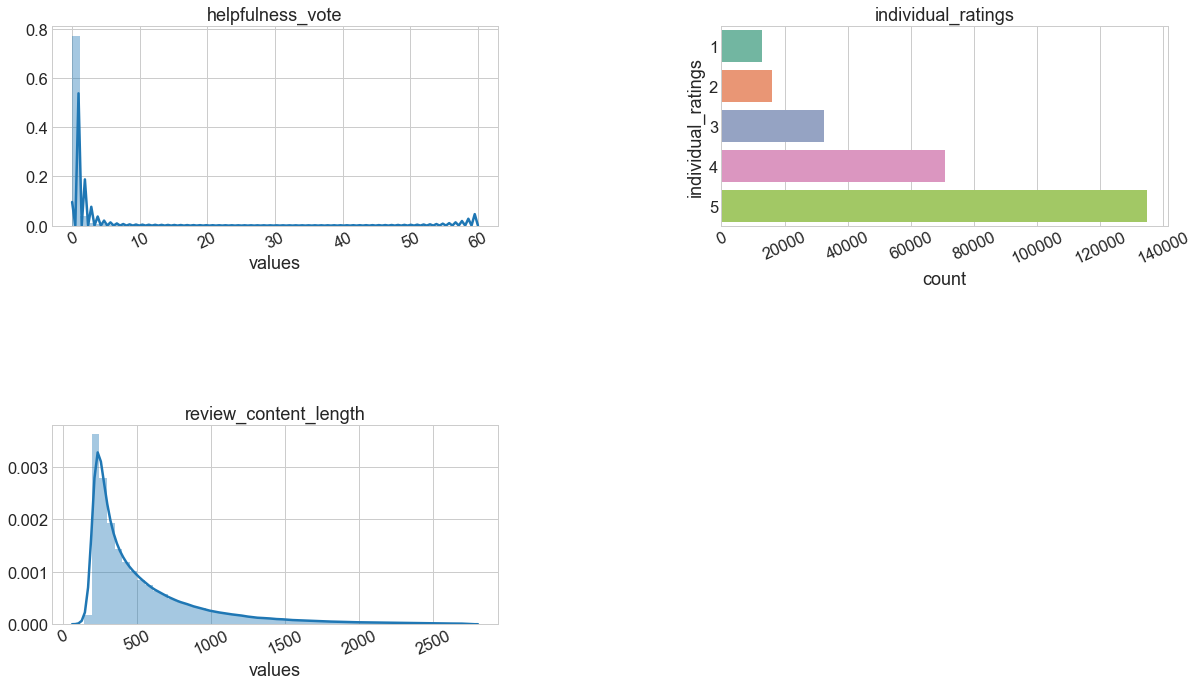

In [18]:
# Let’s plot the distribution of each numerical feature
column_names = ['helpfulness_vote', 'individual_ratings', 'review_content_length']
plot_distribution(df_data, column_names, cols=2, width=20, height=11, hspace=1, wspace=0.5)

In [19]:
print('% of reviews with helpfulness_vote >= 2:')
(df_data['helpfulness_vote'] >= 2).value_counts() / 266805 * 100

% of reviews with helpfulness_vote >= 2:


False    92.73327
True      7.26673
Name: helpfulness_vote, dtype: float64

In [20]:
print('% of reviews in each rating category:')
df_data['individual_ratings'].value_counts() / 266805 * 100

% of reviews in each rating category:


5    50.525665
4    26.557598
3    12.144075
2     6.000637
1     4.772025
Name: individual_ratings, dtype: float64

In [21]:
#reviewer_contribution analysis
df_tmp = pd.DataFrame(df_data.groupby('reviewer_id')['review_content'].count())

print('Distribution of number of reviews each reviewer gave:')
df_tmp.describe(percentiles=[0.001,0.005,0.25,0.5,0.75,0.95,0.99]).T

Distribution of number of reviews each reviewer gave:


,count,mean,std,min,0.1%,0.5%,25%,50%,75%,95%,99%,max
review_content,167608.0,1.591839,2.932747,1.0,1.0,1.0,1.0,1.0,1.0,4.0,12.0,190.0


##### Frequent reviewers analysis

In [22]:
#look at the reviews left by frequent reviewers 
df_tmp = df_data[df_data['reviewer_contribution'] > 12]

print('Number of frequent reviewrs:', len(set(df_tmp['reviewer_id'])))
print('\nDistribution of hotel counts by frequent reviewrs:')
print(df_tmp.groupby('reviewer_id')['Hotel_ID'].nunique().describe())

print('\nRatings left by frequent reviewrs:')
print(df_tmp['individual_ratings'].value_counts())



Number of frequent reviewrs: 69134

Distribution of hotel counts by frequent reviewrs:
count    69134.000000
mean         1.603364
std          1.673391
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         49.000000
Name: Hotel_ID, dtype: float64

Ratings left by frequent reviewrs:
5    46122
4    41654
3    18161
2     5938
1     2886
Name: individual_ratings, dtype: int64


In [23]:
#prepare the data for hotel related plots
df_tmp = df_data.groupby('Hotel_ID').agg({'review_content': 'count',
                                          'average_rating': 'first', 
                                          'hotel_star': 'first'
                                         })
df_tmp = df_tmp.rename(columns={'review_content': 'number_of_reviews_hotel'})
df_tmp.head()

,number_of_reviews_hotel,average_rating,hotel_star
Hotel_ID,,,
1,1934,4.5,5.0
2,1257,4.5,4.0
3,670,4.5,4.0
4,2540,4.5,4.0
5,1391,4.5,4.0


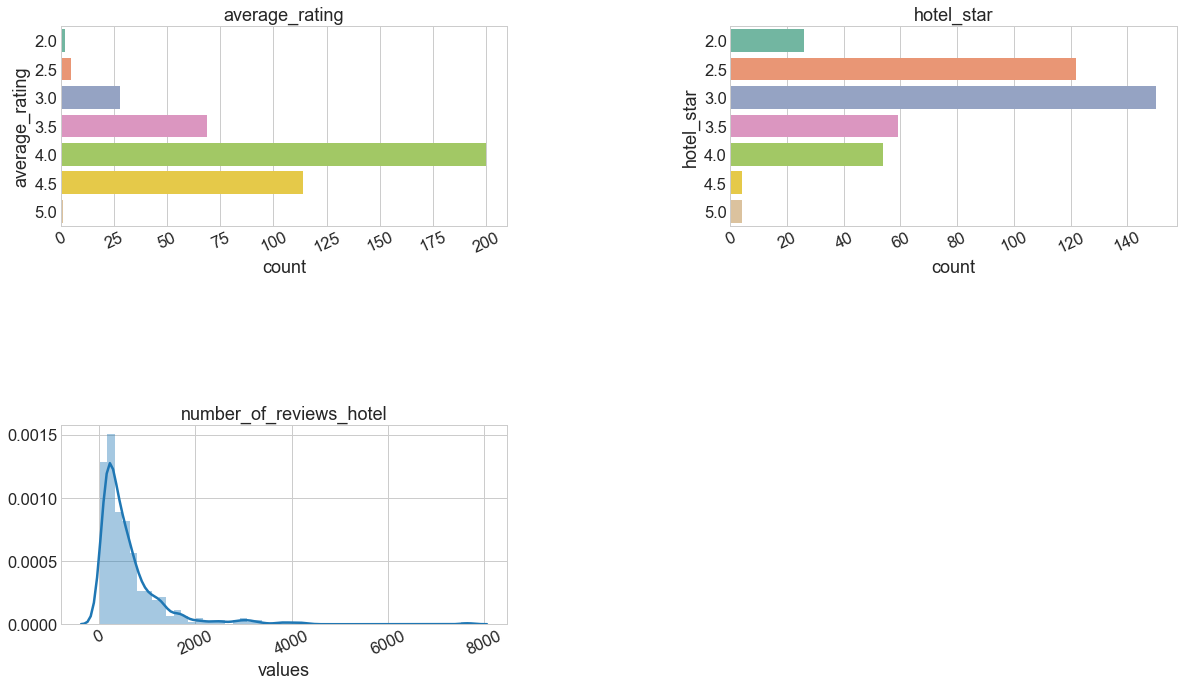

In [24]:
column_names = ['average_rating', 'hotel_star', 'number_of_reviews_hotel']
plot_distribution(df_tmp, column_names, cols=2, width=20, height=11, hspace=1, wspace=0.5)

##### Popular hotels analysis 

There are  5  hotels with more than  3672  reviews (99th percentile)
Total number of reviews for these hotels:  23605 ( 8.84 % of all data)
These hotels have the following stars:  {4.5, 4.0}


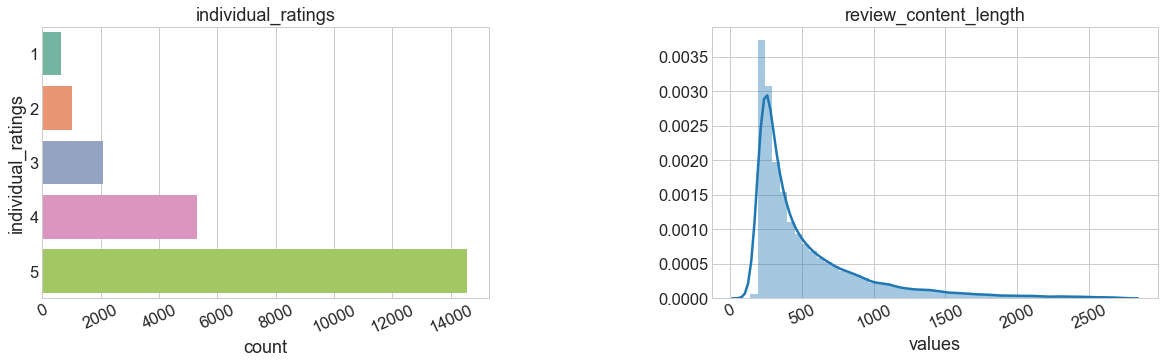

In [25]:
pct99 = df_tmp['number_of_reviews_hotel'].quantile(0.99)

list_hotel_IDs = list(set(df_tmp[df_tmp['number_of_reviews_hotel'] > pct99].index))
print('There are ', len(list_hotel_IDs), ' hotels with more than ', int(pct99), ' reviews (99th percentile)')

df_most_reviewd_H = df_data[df_data['Hotel_ID'].isin(list_hotel_IDs)]
print('Total number of reviews for these hotels: ', len(df_most_reviewd_H), 
      '(', int(len(df_most_reviewd_H)/266805*10000)/100, '% of all data)') 
      
print('These hotels have the following stars: ', set(df_most_reviewd_H['hotel_star']))

column_names = ['individual_ratings', 'review_content_length']
plot_distribution(df_most_reviewd_H, column_names, cols=2, width=20, height=5, hspace=1, wspace=0.5)

## Conclusions from Univariate EDA
- 7.3% of reviews have helpfulness_vote >= 2, hence topic modeling on this reviews might be misleading but still can give you an idea what people consider important 
- majority of reviews (77%) are positive and only (11%) are negative (this explains why we have majority of hotel ratings at least 4). We might want to redefine "positive" reviews
- it looks like reviewers like to stay in the same hotels and give that hotel rating every time (from frequent reviewers analysis and popular hotels analysis). I think those reviews are still relevant for topic modeling
 

In [26]:
# create date period variables
df_data['day_of_week'] = df_data['py_review_date'].dt.weekday_name
df_data['year'] = df_data['py_review_date'].dt.year.fillna(0).apply(int)
df_data['month'] = df_data['py_review_date'].dt.month_name()
df_data['year-month'] = df_data['py_review_date'].dt.year.fillna(0).apply(int)*100 + \
                        df_data['py_review_date'].dt.month.fillna(0).apply(int)

df_data['quarter'] = 'Q' + df_data['py_review_date'].dt.quarter.fillna(0).apply(int).apply(str)
df_data['year-quarter'] = df_data['py_review_date'].dt.year.fillna(0).apply(int).apply(str) + 'Q' + \
                          df_data['py_review_date'].dt.quarter.fillna(0).apply(int).apply(str)

In [27]:
#example of the date variables
df_data[['py_review_date', 'year', 'month', 'year-month', 'quarter', 'year-quarter']].tail(1)

,py_review_date,year,month,year-month,quarter,year-quarter
272241,2010-07-02,2010,July,201007,Q3,2010Q3


### Transfer data frame between Jupiter notebooks
Next step "Text preprocessing" is coded in separate Jupiter notebook. So that
- it is easier to locate program for a particular task
- Jupiter notebook is not very long and easier to read

Use pickle.load() to save pandas data frame with cleaned data preserving object structure to be used in other programs

In [28]:
with open(output_folder + 'clean_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df_data, f, pickle.HIGHEST_PROTOCOL)